In [28]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
# 1) Common bile duct; 2) Cystic artery 3) Cystic duct; 4) Gallbradder; 5) Instrument; 6) liver edge; 7) Luviere Sulcus.
category_id = {
    'Gallbradder': 1,
    'Commonbileduct': 2,
    'Cysticduct': 3,
    'Instrument':4,
    'liveredge':5,
    'Cysticartery':6,
    'LuviereSulcus':7}

In [4]:
image = cv2.imread('After_cut_no_ICG.jpg')
mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

In [22]:
with open('annotation.json', 'r') as f:
    annotations = json.load(f)
    annotations = list(annotations.values())[0]['regions']
    
    for key,values in annotations.items():
        
        point_x = values['shape_attributes']['all_points_x']
        point_y = values['shape_attributes']['all_points_y']
        
        points = np.stack((point_x, point_y), axis=1)
        points = points.reshape((1,-1,2))
        points = points.astype(np.int32)
        
        category = values['region_attributes']['label']
        
        if category != "Gallbradder":
            color_id = category_id[category]
            cv2.fillPoly(mask, [points], color=color_id)   
        else:
            
    

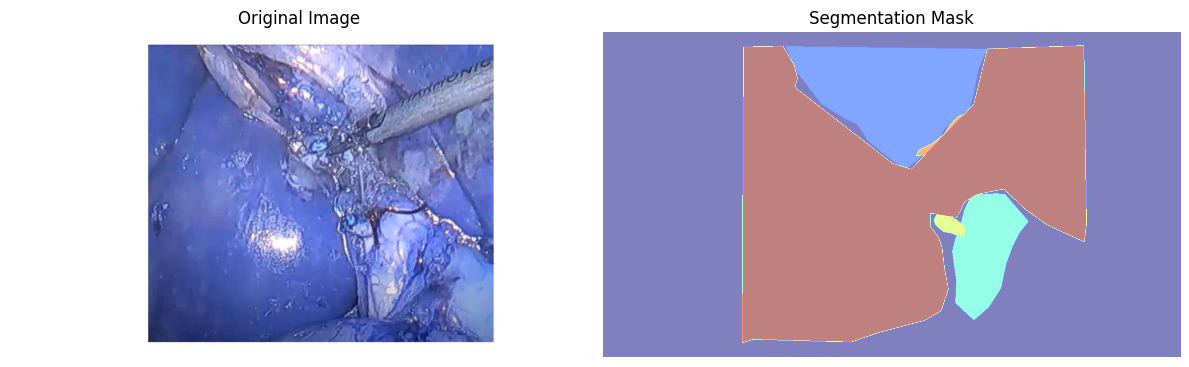

In [29]:
# Plot the image and the segmentation mask side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the mask
axes[1].imshow(mask, cmap='jet', alpha=0.5)  # Use jet color map for better visibility
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

plt.tight_layout()
plt.show()